### Importamos las librerias necesarias para comenzar el proceso de EDA

In [64]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import herramientas
import warnings
warnings.filterwarnings("ignore")

 #### EDA datasets: **user_items_limpio** 

Se leen los datos del archivo .csv y se guardan en un dataframe

In [65]:
df_items=pd.read_csv(r'data\user_items_limpio.csv')


Revisamos la cantidad de filas y columnas , ademas del tipo de dato del mismo dataframe

In [66]:
df_items

,item_id,item_name,playtime_forever,user_id,items_count,steam_id
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479
...,...,...,...,...,...,...
5094077,346330,BrainBread 2,0,76561198329548331,7,76561198329548331
5094078,373330,All Is Dust,0,76561198329548331,7,76561198329548331
5094079,388490,One Way To Die: Steam Edition,3,76561198329548331,7,76561198329548331
5094080,521570,You Have 10 Seconds 2,4,76561198329548331,7,76561198329548331


Este conjunto de datos tiene 6 columnas y 5094082 registros. Para recordar, contiene la información relacionada los usuarios y los juegos que consumen como el tiempo acumulado (en minutos) que han jugado a un juego, la cantidad de items que consumen así como los identificadores de los juegos que consumen y del propio usuario y la url del perfil del mismo.

In [67]:
herramientas.verifica_tipo_y_nulos(df_items)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,[<class 'int'>],100.0,0.0,0
1,item_name,[<class 'str'>],100.0,0.0,0
2,playtime_forever,[<class 'int'>],100.0,0.0,0
3,user_id,[<class 'str'>],100.0,0.0,0
4,items_count,[<class 'int'>],100.0,0.0,0
5,steam_id,[<class 'int'>],100.0,0.0,0


- **Columna: 'playtime_forever'** 

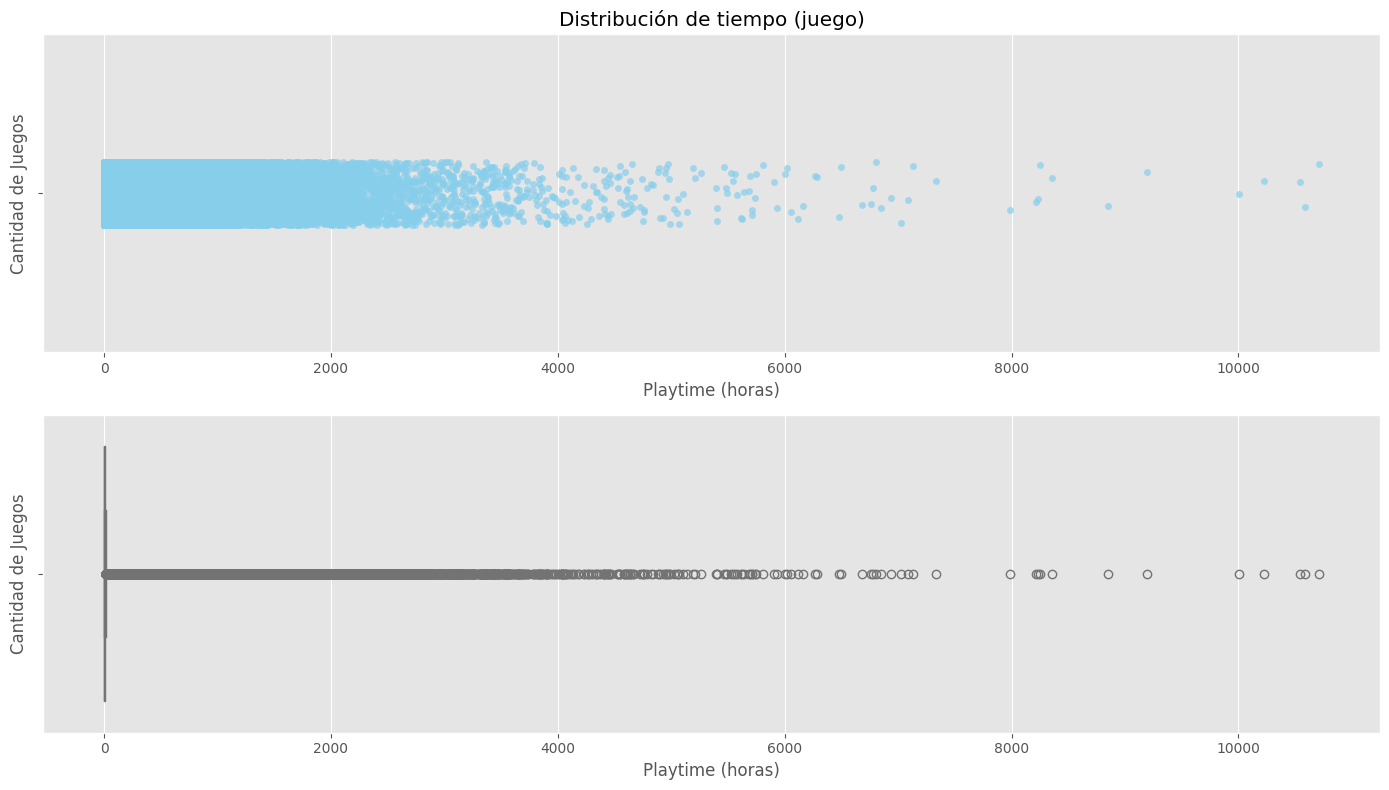

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

df_items['playtime_hours'] = df_items['playtime_forever'] / 60
# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# Gráfico de puntos (stripplot)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1, color='skyblue', alpha=0.7)
ax1.set_xlabel('Playtime (horas)')
ax1.set_ylabel('Cantidad de Juegos')
ax1.set_title('Distribución de tiempo (juego)')

# Gráfico de caja (boxplot)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2, color='lightgreen')
ax2.set_xlabel('Playtime (horas)')
ax2.set_ylabel('Cantidad de Juegos')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Se puede observar que cada usuario, por juego, pasa un tiempo medio de 0.57 hs jugando y el 75% de los jugadores estuvieron 5.92 hs jugando a un juego, pero se observa una gran cantidad de valores atípicos por encima de las 14.79 hs que juega cada usuario a un juego.

In [69]:
estadisticas = df_items['playtime_hours'].describe()
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas[5],2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(estadisticas[6],2)}')
herramientas.bigote_max(df_items['playtime_hours'])

El precio medio (mediana) de los juegos es de: 0.57
El precio promedio (mean) de los juegos es de: 16.51
El 75% de los juegos tienen un precio menor de: 5.92
El bigote superior de la variable playtime_hours se ubica en: 14.79
Hay 763586 valores atípicos en la variable playtime_hours


- **Columna: 'items_count'** 

Indica la cantidad de juegos que consumen o compraron alguna vez los usuarios.

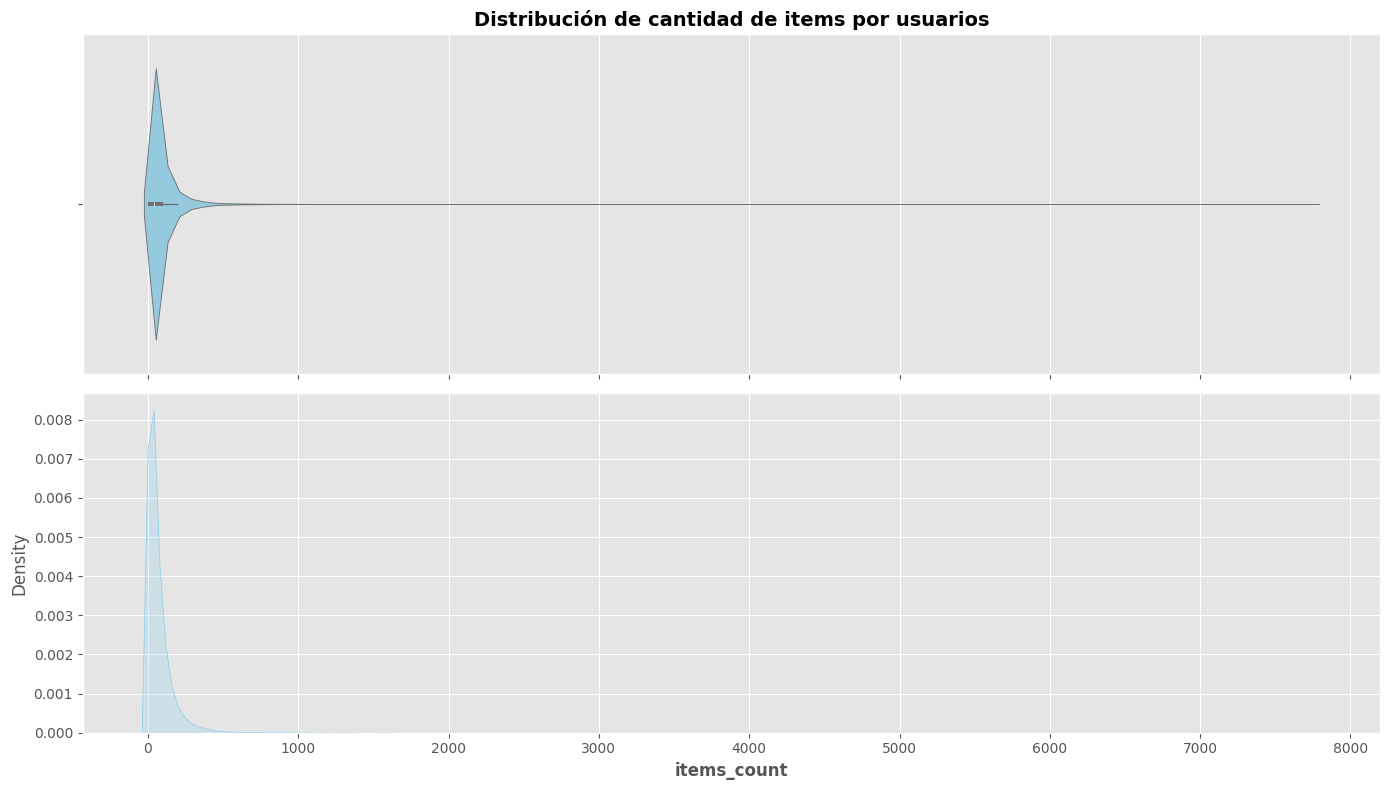

In [70]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
user_items_count = df_items.groupby('user_id')['items_count'].unique().explode()
user_items_count  = pd.DataFrame(user_items_count )
user_items_count_1  = user_items_count.sort_values('items_count', ascending=False)

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

sns.violinplot(data=user_items_count_1, x='items_count', ax=ax1, color='skyblue')
ax1.set_xlabel('') 
ax1.set_title('Distribución de cantidad de items por usuarios', fontsize=14, fontweight='bold')

sns.kdeplot(data=user_items_count_1 , x='items_count', ax=ax2, color='skyblue', fill=True)
ax2.set_xlabel('items_count', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [71]:
stats = user_items_count['items_count'].astype(float).describe()
print(f'El 75% de los juegos tienen un precio menor de: {round(stats [6],2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(stats [1],2)}')
print(f'El precio medio (mediana) de los juegos es de: {round(stats [5],2)}')
herramientas.bigote_max(user_items_count.astype(float)['items_count'])

El 75% de los juegos tienen un precio menor de: 87.0
El precio promedio (mean) de los juegos es de: 71.84
El precio medio (mediana) de los juegos es de: 40.0
El bigote superior de la variable items_count se ubica en: 196.5
Hay 4957 valores atípicos en la variable items_count


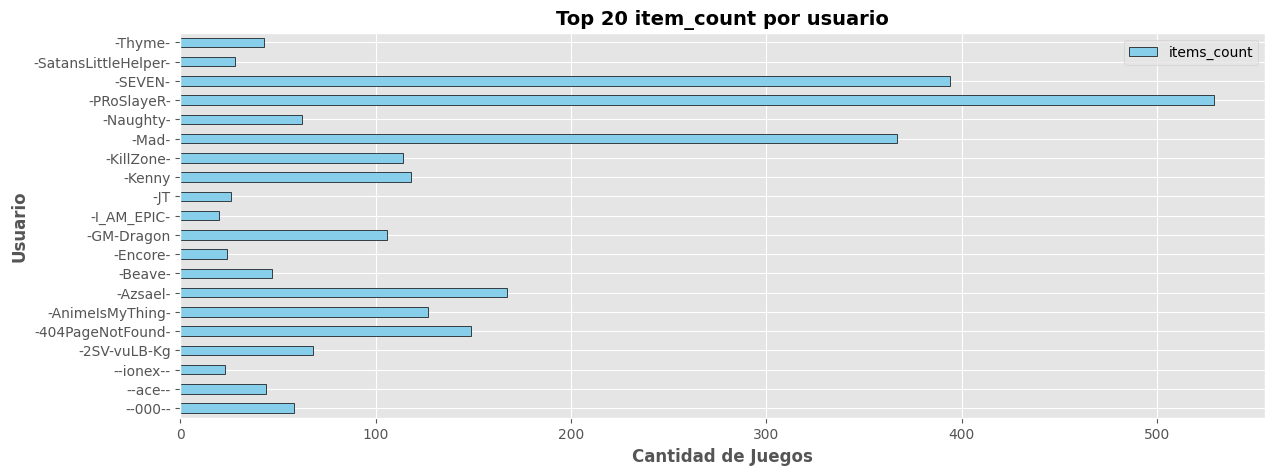

In [72]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14, 5))

user_items_count[:20].plot(kind='barh', ax=ax, color='skyblue', edgecolor='black')

ax.set_xlabel('Cantidad de Juegos', fontsize=12, fontweight='bold')
ax.set_ylabel('Usuario', fontsize=12, fontweight='bold')
ax.set_title('Top 20 item_count por usuario', fontsize=14, fontweight='bold')

ax.grid(True)
plt.show()

Se puede ver que el usuario que mas cantidad de juegos a consumido supera los 500 juegos, pero el 75% de los usuarios ha adquirido menos de 87 items. Se pueden ver 4957 usuarios que han adquirido mas de 196 items que podrían considerarse como atípicos.

 #### EDA datasets: **user_reviews_limpio** 

Se leen los datos del archivo .csv y se guardan en un dataframe

In [73]:
df_reviews=pd.read_csv(r'data\user_review_limpio.csv')

In [74]:
df_reviews

,reviews_user_id,reviews_item_id,reviews_helpful,reviews_recommend,reviews_review,reviews_date,sentiment_analysis,rating
0,76561197970982479,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2011-11-05,1,2.0
1,76561197970982479,22200,No ratings yet,True,It's unique and worth a playthrough.,2011-07-15,2,2.0
2,76561197970982479,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2011-04-21,1,2.0
3,js41637,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2014-06-24,1,2.0
4,js41637,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2013-09-08,1,2.0
...,...,...,...,...,...,...,...,...
58425,76561198312638244,70,No ratings yet,True,a must have classic from steam definitely wort...,Formato inválido,2,2.0
58426,76561198312638244,362890,No ratings yet,True,this game is a perfect remake of the original ...,Formato inválido,1,2.0
58427,LydiaMorley,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,Formato inválido,1,2.0
58428,LydiaMorley,730,No ratings yet,True,:D,Formato inválido,2,2.0


Se tienen 58430 registros de opiniones de los usuarios respecto a los juegos que consumen. Si bien no hay nulos, hay que recordar que en el ETL se observaron datos faltantes en la columna 'reviews_date' donde se rellenó con 'Formato inválido'.

In [75]:
herramientas.verifica_tipo_y_nulos(df_reviews)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,reviews_user_id,[<class 'str'>],100.00,0.00,0
1,reviews_item_id,[<class 'int'>],100.00,0.00,0
2,reviews_helpful,[<class 'str'>],100.00,0.00,0
3,reviews_recommend,[<class 'bool'>],100.00,0.00,0
4,reviews_review,"[<class 'str'>, <class 'float'>]",99.95,0.05,30
5,reviews_date,[<class 'str'>],100.00,0.00,0
6,sentiment_analysis,[<class 'int'>],100.00,0.00,0
7,rating,[<class 'float'>],85.46,14.54,8497


- **Columnas: 'reviews_recommend' y 'sentiment_analysis'**

In [76]:
herramientas.resumen_cant_porcentaje(df_reviews,'reviews_recommend')

,Cantidad,Porcentaje
reviews_recommend,,
True,51691,88.47
False,6739,11.53


In [77]:
herramientas.resumen_cant_porcentaje(df_reviews,'sentiment_analysis')

,Cantidad,Porcentaje
sentiment_analysis,,
1,35878,61.40
2,17418,29.81
0,5134,8.79


De los registros de reviews  el 61.40% de los reviews reflejan sentimientos **neutrales**, el 29.81% reflejan sentimientos **positivos** hacia el juego y el 8.79% fue **negativo**. Pero en el 88.87% de los reviews **se recomiendan** los juegos que consumen.

En el siguiente código se busca ver la cantidad de recomendaciones para los distintos sentimientos de las reviews.

In [78]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_reviews_agr = df_reviews.groupby(['sentiment_analysis', 'reviews_recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_reviews_agr.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_reviews_agr.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analysis reviews_recommend                      
0                  False                  1688    2.888927
                   True                   3446    5.897655
1                  False                  4444    7.605682
                   True                  31434   53.797707
2                  False                   607    1.038850
                   True                  16811   28.771179


Se puede ver que el porcentaje respecto del total de los reviews que el 53.79% de los reviews que reflejan un **sentimiento neutral** recomienda el juego por lo que un sentimiento neutral podría estar relacionado con un comentario sencillo sin muchos detalles pero que aún así el juego le gustó como para recomendar. Por otra parte, de los comentarios que reflejaron un **sentimiento negativo** el cual es de 5.89% aún recomienda el juego, lo que es algo contradictorio.

In [79]:
df_reviews_len=len(df_reviews['reviews_user_id'].unique())
print(f"Cantidad de usuarios únicos que opinaron: {df_reviews_len}")

Cantidad de usuarios únicos que opinaron: 25457


Un total de 25457 usurarios dieron su opinión sobre el juego que consumen, con lo que un usuario hizo mas de un comentario.

- **Columna: 'reviews_date'**

In [80]:
df_reviews_date_len=len(df_reviews[df_reviews["reviews_date"]=="Formato inválido"])
print(f'La cantidad de fechas en formato inválido son: {(df_reviews_date_len)}')

La cantidad de fechas en formato inválido son: 9932


La cantidad de fechas en formato inválido son: 9932
Hay 9932 registros que no contienen la fecha del review.

En el siguiente gráfico se puede ver la distribución de la cantidad de reviews por día, sin tener en cuenta los que no tenía la fecha.

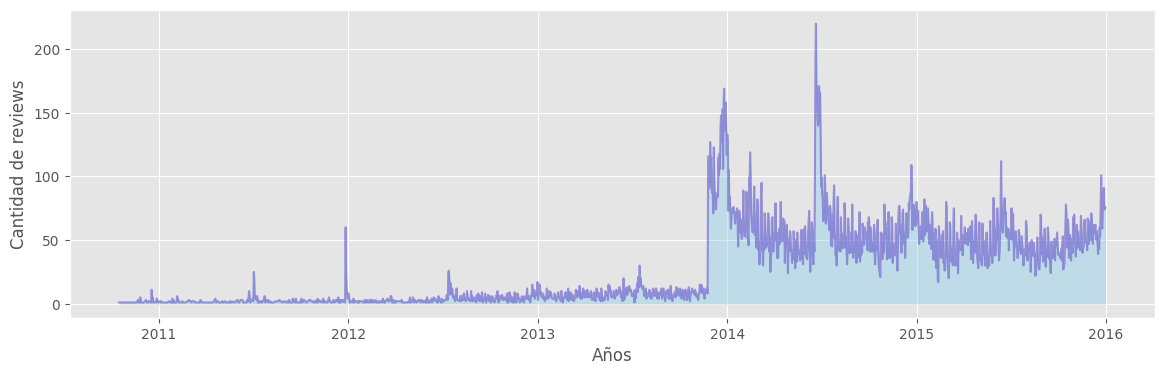

In [81]:
# Se hace un dataframe auxiliar para analizar solo las fechas (hay campos con 'Datos no disponibles')
df = df_reviews[df_reviews["reviews_date"].str.match(r"^\d{4}-\d{2}-\d{2}$")]
# Convierte a formato fecha
df["reviews_date"] = pd.to_datetime(df["reviews_date"])
# Calcula la cantidad de review por fecha
df_counts_reviews = df.groupby("reviews_date").count()

# Grafica
plt.figure(figsize=(14, 4))
plt.fill_between(df_counts_reviews.index, df_counts_reviews["reviews_recommend"], color="skyblue", alpha=0.4)
plt.plot(df_counts_reviews.index, df_counts_reviews["reviews_recommend"], color="Slateblue", alpha=0.6)
plt.ylabel('Cantidad de reviews')
plt.xlabel('Años')
plt.show()


In [82]:
df_reviews_dias=df_counts_reviews.sort_values(by='reviews_recommend', ascending=False)['reviews_recommend'][:5]
print('Días de cantidad pico de reviews')
df_reviews_dias


Días de cantidad pico de reviews


reviews_date
2014-06-21    220
2014-06-20    192
2014-06-27    171
2014-06-23    171
2013-12-26    169
Name: reviews_recommend, dtype: int64

Se observa que cerca del 2014 la cantidad de reviews por día es bajo, con algunos picos puntuales y luego aumenta considerablemente la cantidad de comentarios con un pico máximo el 21-06-2014 con 220 comentarios en un solo día.

 #### EDA datasets: **steam_games_limpio** 

Se leen los datos del archivo .csv y se guardan en un dataframe

In [83]:
df_game=pd.read_csv(r'data\steam_games_limpio.csv')

Se revisan los tipos de datos y cantidad de nulos.

In [84]:
herramientas.verifica_tipo_y_nulos(df_game)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,genres,[<class 'str'>],100.00,0.00,0
1,price,[<class 'float'>],100.00,0.00,0
2,early_access,[<class 'bool'>],100.00,0.00,0
3,id,[<class 'int'>],100.00,0.00,0
4,release_anio,[<class 'str'>],100.00,0.00,0
5,publisher,"[<class 'str'>, <class 'float'>]",99.93,0.07,47
6,title,[<class 'str'>],100.00,0.00,0
7,developer,[<class 'str'>],100.00,0.00,0


Se observan nulos en la columna publisher, se procede a eliminar los nulos de la misma

In [85]:
df_game_clean=df_game.dropna(subset='publisher')
df_game=df_game_clean

Se vuelve a revisar la existenvias de datos y cantidad de nulos

In [86]:
herramientas.verifica_tipo_y_nulos(df_game)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,genres,[<class 'str'>],100.0,0.0,0
1,price,[<class 'float'>],100.0,0.0,0
2,early_access,[<class 'bool'>],100.0,0.0,0
3,id,[<class 'int'>],100.0,0.0,0
4,release_anio,[<class 'str'>],100.0,0.0,0
5,publisher,[<class 'str'>],100.0,0.0,0
6,title,[<class 'str'>],100.0,0.0,0
7,developer,[<class 'str'>],100.0,0.0,0


In [87]:
df_game

,genres,price,early_access,id,release_anio,publisher,title,developer
0,Action,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Kotoshiro
1,Casual,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Kotoshiro
2,Indie,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Kotoshiro
3,Simulation,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Kotoshiro
4,Strategy,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Kotoshiro
...,...,...,...,...,...,...,...,...
71546,Indie,1.99,False,610660,2018,Laush Studio,Russian Roads,Laush Dmitriy Sergeevich
71547,Racing,1.99,False,610660,2018,Laush Studio,Russian Roads,Laush Dmitriy Sergeevich
71548,Simulation,1.99,False,610660,2018,Laush Studio,Russian Roads,Laush Dmitriy Sergeevich
71549,Casual,4.99,False,658870,2017,SIXNAILS,EXIT 2 - Directions,"xropi,stev3ns"


Este conjunto de datos tiene 8 columnas y 71504 registros. Este dataframe contiene la información relacionada a cada juego como el precio, el año de lanzamiento, el nombre de la aplicación y del juego, el desarrollador y el publicitador, así como el género. Hay que tener en cuenta que la información se repite porque un juego puede pertenecer a mas de un género.

- **Columna: 'genres'**

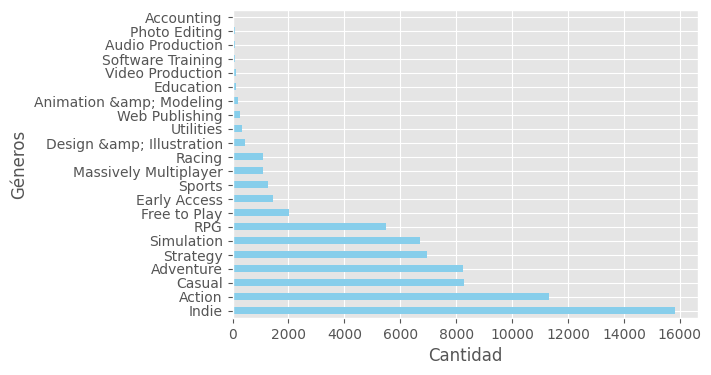

In [88]:
plt.figure(figsize=(6, 4))
df_game['genres'].value_counts().plot(kind='barh', color='skyblue')
plt.xlabel('Cantidad')
plt.ylabel('Géneros')
plt.show()



In [89]:
herramientas.resumen_cant_porcentaje(df_game, 'genres')

,Cantidad,Porcentaje
genres,,
Indie,15841,22.15
Action,11313,15.82
Casual,8279,11.58
Adventure,8235,11.52
Strategy,6956,9.73
Simulation,6698,9.37
RPG,5473,7.65
Free to Play,2029,2.84
Early Access,1460,2.04


In [90]:
df_game.columns

Index(['genres', 'price', 'early_access', 'id', 'release_anio', 'publisher',
       'title', 'developer'],
      dtype='object')

Los juegos estan categorizados mayormente en las categorías Indi, Action, Casual y Adventure. Un juego puede tener mas de un género asociado.

- **Columnas: 'id', 'title'** 

Las columnas (id, title) hacen referencia al identificador único del juego y los nombres de la aplicación y del título del juego. Estos últimos no tienen mas información que analizar. Con el 'id' se puede calcular la cantidad de juegos.

In [91]:
df_game_len = len(df_game['id'].unique())
print(f"El total de juegos que hay registrados son: {df_game_len}")

El total de juegos que hay registrados son: 28831


Hay un total de 28831 juegos en la plataform

- **Columnas: 'publisher' y 'developer'**

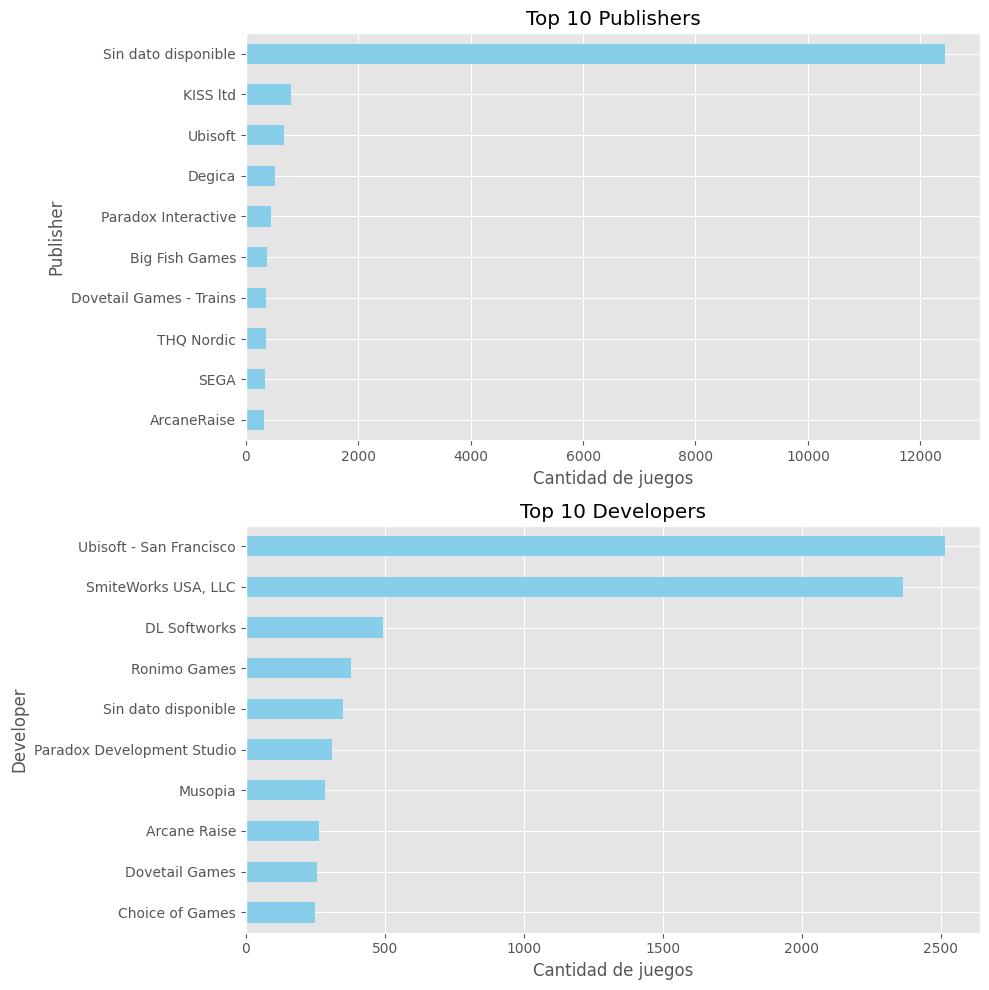

In [92]:
# Definir 'conteo_publisher' y 'conteo_developer'
conteo_publisher = df_game['publisher'].value_counts()
conteo_developer = df_game['developer'].value_counts()

# Crear una figura con dos subplots uno encima del otro
plt.figure(figsize=(10, 10))

# Primer subplot para los publishers
plt.subplot(2, 1, 1)
conteo_publisher[:10].sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Cantidad de juegos') ; plt.ylabel('Publisher') ; plt.title('Top 10 Publishers')

# Segundo subplot para los developers
plt.subplot(2, 1, 2)
conteo_developer[:10].sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Cantidad de juegos') ; plt.ylabel('Developer') ; plt.title('Top 10 Developers')

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

Los publicistas (publisher) de juegos, la mayor parte, no dispone del dato y en el caso de los desarrolladores (developer), Ubisoft y SmiteWorks son los desarrolladores que mas juegos han desarrollado para la plataforma.

- **Columna: 'release_anio'**

In [93]:
herramientas.resumen_cant_porcentaje(df_game, 'release_anio')[:15]

,Cantidad,Porcentaje
release_anio,,
2017,24949,34.89
2016,17652,24.69
2015,12245,17.12
2014,6338,8.86
2013,3016,4.22
2012,2106,2.95
2011,986,1.38
Dato no disponible,850,1.19
2010,653,0.91


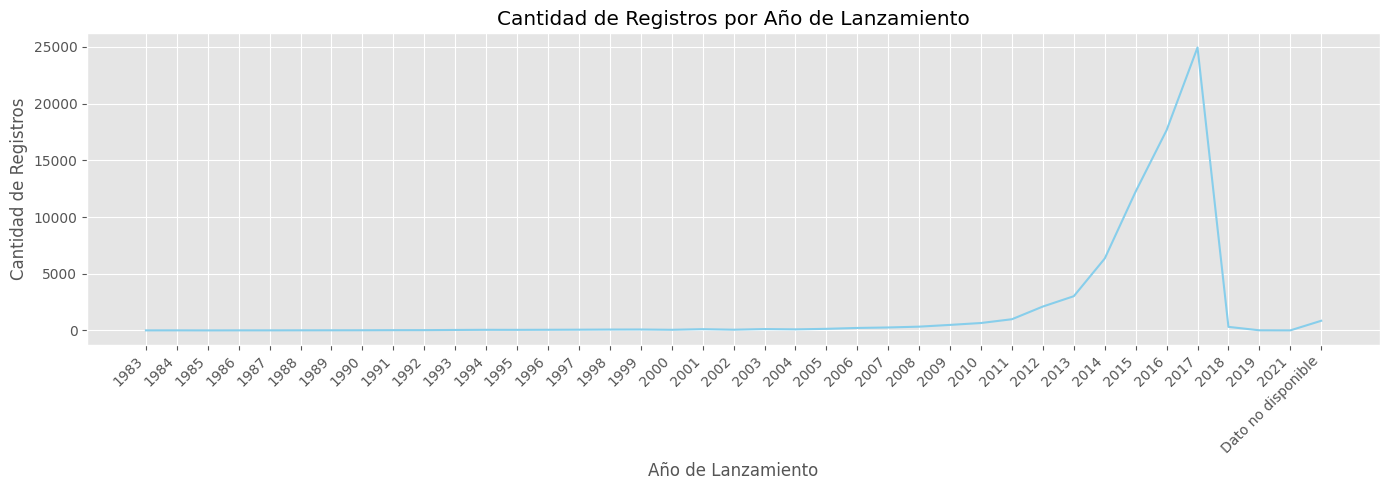

In [94]:
# Cuenta la frecuencia de cada año
conteo_anios = df_game['release_anio'].value_counts()

# Ordena los valores para que 'Datos no disponibles' queden al principio o al final
conteo_anios = conteo_anios.reindex(['Dato no disponible'] + list(conteo_anios.index))
# Ordena los valores por año
conteo_anios = conteo_anios.sort_index()

# Crear la gráfica de línea
plt.figure(figsize=(14, 5))
sns.lineplot(x=conteo_anios.index, y=conteo_anios.values, color='skyblue')
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [95]:
# Filtra los registros con valores numéricos en la columna 'release_anio'
df_game_reg_num = df_game[df_game['release_anio'].str.isnumeric()]

# Convierte la columna 'release_anio' a valores enteros
df_game_reg_num['release_anio'] = df_game_reg_num['release_anio'].astype(int)

# Filtra los registros con años de lanzamiento antes de 2002
df_game_reg_2022 = df_game_reg_num[df_game_reg_num['release_anio'] < 2002]

print(f"Cantidad de registros antes de 2002: {len(df_game_reg_2022)}")
print(f"Cantidad de registros 'Dato no disponible': {df_game[df_game['release_anio'] == 'Dato no disponible'].shape[0]}")

Cantidad de registros antes de 2002: 679
Cantidad de registros 'Dato no disponible': 850


Se observa que 679 juegos lanzados en años anteriores al 2002, lo que puede ser un error porque la plataforma se lanzó en el 2003. Por otra parte, se observan 850 juegos sin la fecha disponible debido a que no estaba especificada o estaba en un formato incorrecto. Luego se ve el crecimiento constante y lento hasta 2012 y luego crece mas rápidamente hasta 2017. A partir de allí, la plataforma limitó la forma de obtener las estadísticas, por eso se ven muchos menos registros.

- **Columna: 'price'**

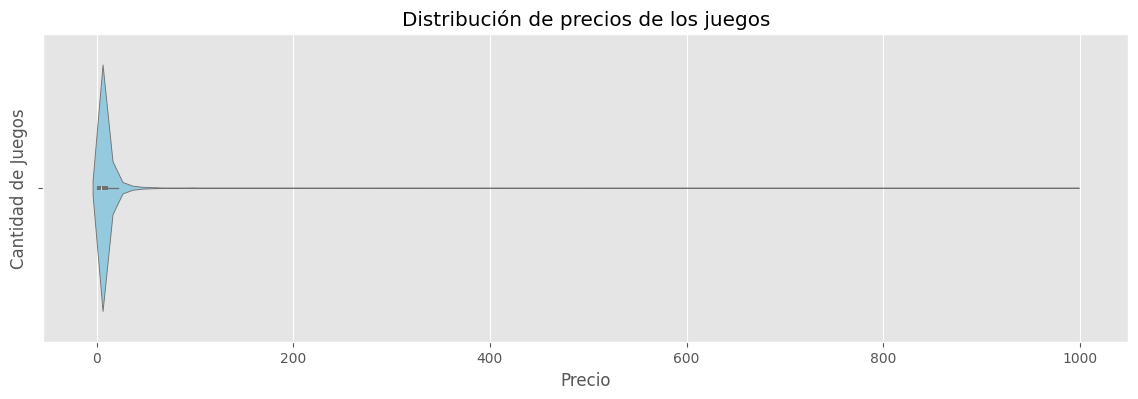

In [96]:
# Obtiene los precios para cada juego y hace un dataframe
precio_unicos = df_game.groupby('id')['price'].unique().reset_index().explode('price')
df_precio_unicos = precio_unicos[['price']]  # Convierte la Serie a un DataFrame

fig, ax = plt.subplots(figsize=(14, 4))

sns.violinplot(data=df_precio_unicos, x='price', ax=ax, color='skyblue')
ax.set_xlabel('Precio') 
ax.set_ylabel('Cantidad de Juegos')
ax.set_title('Distribución de precios de los juegos')

plt.show()


In [97]:
stats = df_precio_unicos.astype(float).describe()
print(f'El 75% de los juegos tienen un precio menor de: {stats.loc["75%"]}')
print(f'El precio promedio (mean) de los juegos es de: {round(stats.loc["mean"],2)}')
print(f'El precio medio (mediana) de los juegos es de: {stats.loc["50%"]}')

herramientas.bigote_max(pd.DataFrame(df_precio_unicos.astype(float))['price'])

El 75% de los juegos tienen un precio menor de: price    9.99
Name: 75%, dtype: float64
El precio promedio (mean) de los juegos es de: price    8.62
Name: mean, dtype: float64
El precio medio (mediana) de los juegos es de: price    4.99
Name: 50%, dtype: float64
El bigote superior de la variable price se ubica en: 21.99
Hay 1746 valores atípicos en la variable price


Se ve que casi el 50% de los juegos (mediana) tienen precios entre 0 y los 4.99 dolares y el 75% de los juegos tienen precios por debajo de 9.99 dolares. Se Observan 1746 valores atípicos, con precios por encima de los 21.99 dolares, pero sin dudas hay algunos juegos de mas de 250 dolares que pueden considerarse errores en los precios.